## Linear Regression

In [3]:
import pandas as pd
import numpy as np

In [10]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [20]:
df = pd.read_csv('Dataset/housing.csv', header = None, delimiter =  r"\s+", names = column_names)

In [21]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
df.shape

(506, 14)

In [ ]:
x = df.iloc[:,0:13] #type 1

In [28]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [ ]:
x = df.drop('MEDV', axis = 1)  #type 2

In [32]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [33]:
y = df['MEDV']

In [34]:
print(x.shape, y.shape)

(506, 13) (506,)


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

#### Feature scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### simple Linear Regression model

In [37]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred1 = linearReg.predict(x_test)

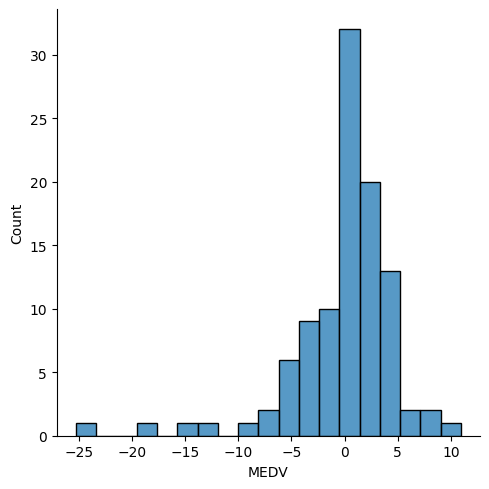

In [39]:
import seaborn as sns
sns.displot(y_pred1- y_test)

In [41]:
from sklearn.metrics import r2_score
score1 = r2_score(y_pred1, y_test)
score1

0.6333247469014345

#### using cross validation

In [42]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(linearReg, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

In [43]:
print(np.mean(mse))

-23.65441827030465


0.6333247469014345


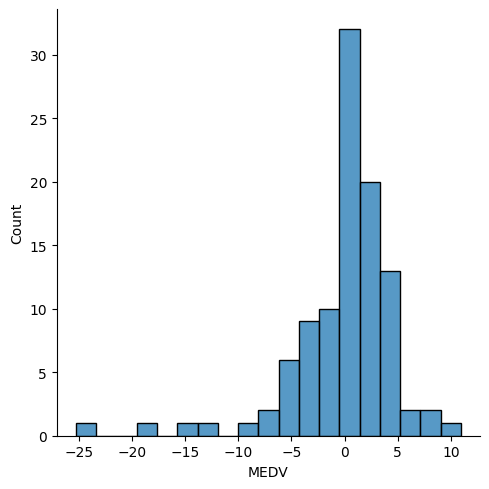

In [47]:
y_pred2 = linearReg.predict(x_test)
score2 = r2_score(y_pred2, y_test)
print(score2)
sns.displot(y_pred2-y_test)

## Ridge Regreession

In [48]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge()

In [49]:
from sklearn.model_selection import GridSearchCV

In [54]:
parameters = {'alpha':[1,2,3,4,5,6,7,10,20,30,40,50,60,80]}

ridgeCV = GridSearchCV(ridgeReg, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridgeCV.fit(x_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,2


In [59]:
print(ridgeCV.best_params_)
print(ridgeCV.best_score_)

{'alpha': 2}
-23.646284736453765


In [56]:
y_pred3 = ridgeCV.predict(x_test)
score3 = r2_score(y_pred3, y_test)

0.6284733581101556


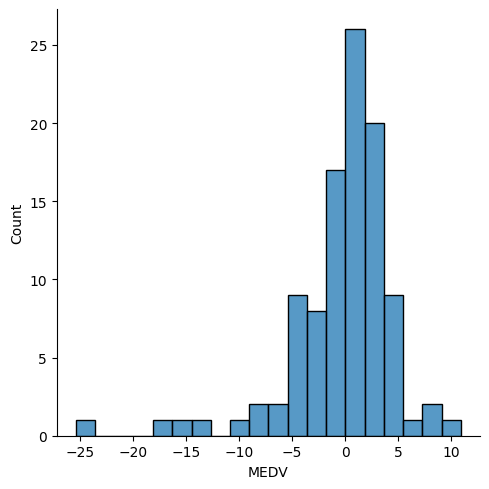

In [57]:
print(score3)
sns.displot(y_pred3-y_test)

## Lasso Regression

In [60]:
from sklearn.linear_model import Lasso
lassoReg = Lasso()
lassoCV = GridSearchCV(lassoReg, parameters, scoring = 'neg_mean_squared_error', cv= 5)
lassoCV.fit(x_train, y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [61]:
print(lassoCV.best_params_)
print(lassoCV.best_score_)

{'alpha': 1}
-29.49640737047796


In [62]:
y_pred4 = lassoCV.predict(x_test)
score4 = r2_score(y_pred4, y_test)

0.3186642087016749


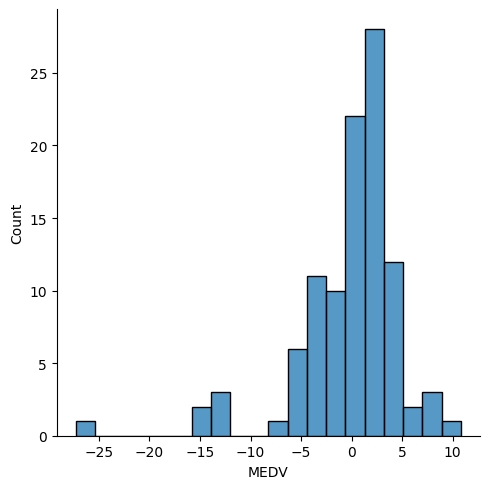

In [63]:
print(score4)
sns.displot(y_pred4-y_test)